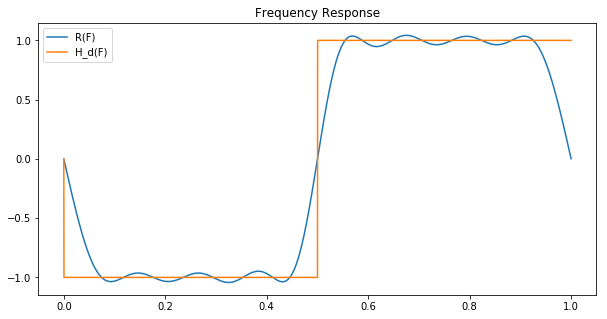

/home/lab530/anaconda3/envs/KenYuADSP/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


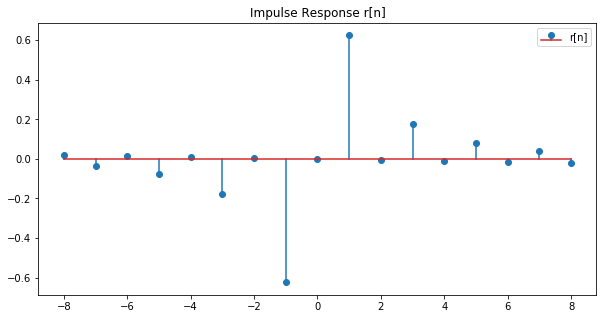

In [53]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import cmath

k = 8
N = 2*k+1
N_PTS = 10000

def hilbert_fun(x):
    if x == 0:
        return 0
    elif 0 <= x <= 0.5: 
        return -1j
    elif 0.5 < x <= 1:
        return 1j

samples = []
for i in np.arange(0, 1, 1/N):
    samples.append(hilbert_fun(i))

# Add transition band 
samples[1]   = -0.9j
samples[k]   = -0.7j
samples[k+1] =  0.7j
samples[2*k]  = 0.9j

r_1 = np.fft.ifft(samples)
r_n = np.concatenate((r_1[ceil(N/2):], r_1[:floor(N/2)+1]), axis=None)  # + r_1[floor(N/2)] + r_1[:math.floor(N/2)]

R_F = []
F = np.arange(0.0, 1.0, 1/N_PTS)
for F_i in F:
    s = 0
    for n in range(-8, 8+1):
        s += r_n[n+8]*cmath.exp(-1j*2*pi*F_i*n)
    R_F.append(s.imag)

plt.figure(figsize=(10,5))
plt.plot(F, R_F)
plt.plot(F, [hilbert_fun(i).imag for i in F])
plt.title("Frequency Response")
plt.legend(['R(F)', 'H_d(F)'])
plt.show()

plt.figure(figsize=(10,5))
plt.stem(np.array(range(-8, 8+1)), r_n)
plt.title("Impulse Response r[n]")
plt.legend(['r[n]'])
plt.show()

# # Test example
# r1_test = np.fft.ifft(np.array([1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1]))
# print(r1_test)
# rn_test = np.concatenate((r1_test[ceil(N/2):], r1_test[:floor(N/2)+1]), axis=None) 
# # test_r_n = [0.04, -0.049, -0.035, 0.]
# print(rn_test)